In [2]:
# 201758101 배성규 
# 과제2

# numpy
1) 모양이 (20,)인 4개의 1차원 배열 a,b,c,d를 만드시오 
  -  a : 처음 15개는 3, 나머지는 5개는 4인 배열
  -  b : 정수집합 {1,2}에서 랜덤하게 뽑은 난수 배열(단, seed = 1)
  -  c : 정수집합 {1,2, ..., 99, 100}에서 랜덤하게 뽑은 난수 배열 (단 seed = 2)
  -  d : [0,1) 구간에서 뽑은 난수배열(단, seed = 3) 에 대하여 100을 곱한 후 소수점 이하는 버리고 정수 부분만 취하여 1을 더한배열
    

In [3]:
import numpy as np
a = np.arange(20)
b = np.arange(20)
c = np.arange(20)
d = np.arange(20)

In [4]:
a[0:15] = 3
a[15:21] = 4

In [5]:
a

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4])

In [6]:
np.random.seed(1)
b = np.random.randint(1,3, size = 20)


In [7]:
b

array([2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1])

In [8]:
np.random.seed(2)
c = np.random.randint(1, 101, size = 20)

In [9]:
c

array([41, 16, 73, 23, 44, 83, 76,  8, 35, 50, 96, 76, 86, 48, 64, 32, 91,
       21, 38, 40])

In [10]:
np.random.seed(3)
d = np.random.rand(20) * 100

In [11]:
d = np.trunc(d) + 1

In [12]:
d

array([56., 71., 30., 52., 90., 90., 13., 21.,  6., 45.,  3., 46., 65.,
       28., 68., 60.,  3., 56., 26., 42.])

 - 2) 1)에서 만든 4개의 1차원 배열을 각각 2차원 배열, 즉 모양이 (20,1)이 되도록 재구조화한후, 칼럼으로 이어 붙여 모양이 (20,4)인 2차원배열 m을 만드시오 

In [13]:
a_reshape = a.reshape(20,1)
b_reshape = b.reshape(20,1)
c_reshape = c.reshape(20,1)
d_reshape = d.reshape(20,1)

In [14]:
m = np.concatenate([a_reshape, b_reshape, c_reshape, d_reshape], axis = 1)

In [15]:
m

array([[ 3.,  2., 41., 56.],
       [ 3.,  2., 16., 71.],
       [ 3.,  1., 73., 30.],
       [ 3.,  1., 23., 52.],
       [ 3.,  2., 44., 90.],
       [ 3.,  2., 83., 90.],
       [ 3.,  2., 76., 13.],
       [ 3.,  2.,  8., 21.],
       [ 3.,  2., 35.,  6.],
       [ 3.,  1., 50., 45.],
       [ 3.,  1., 96.,  3.],
       [ 3.,  2., 76., 46.],
       [ 3.,  1., 86., 65.],
       [ 3.,  2., 48., 28.],
       [ 3.,  2., 64., 68.],
       [ 4.,  1., 32., 60.],
       [ 4.,  1., 91.,  3.],
       [ 4.,  2., 21., 56.],
       [ 4.,  1., 38., 26.],
       [ 4.,  1., 40., 42.]])

3) 배열 m에 대하여 열별 평균을 구하시오

In [16]:
m.mean(axis = 0)

array([ 3.25,  1.55, 52.05, 43.55])

4) 0번째 칼럼의 값이 3인, 즉 처음 15개의 행을 취하여 m3을 만들고 각 열의 평균을 구하시오

In [17]:
m3 = m[: 15, :4]

In [18]:
m3.mean(axis = 0)

array([ 3.        ,  1.66666667, 54.6       , 45.6       ])

5) 1번째 칼럼의 값이 1인 행을 취하여 m1을 만들고 각 열의 최대값을 구하시오 

In [19]:
m1 = m[m[:,1] == 1, :]

In [20]:
m1.max(axis = 0)

array([ 4.,  1., 96., 65.])

6) 3번째 열의 값이 2번째 열의 값보다 더 큰 행의 행 인덱스를 구하시오

In [21]:
np.where(m[:,2:3]<m[:,3:])[:1]


(array([ 0,  1,  3,  4,  5,  7, 14, 15, 17, 19], dtype=int64),)

# 판다스


1) 타이타닉 데이터 파일을 읽어 titanic 데이터프레임을 만든 후, Name, Ticket, Cabin 칼럼을 삭제한 titanic2 데이터 프레임을 만들어 마지막 3개의 행을 출력하시오 

In [22]:
import pandas as pd

In [23]:
titanic = pd.read_csv('titanic.csv')

In [24]:
titanic2 = titanic.drop(columns = ['Name', 'Ticket', 'Cabin'], axis = 1)

In [25]:
titanic2.tail(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
888,889,0,3,female,NaN,1,2,23.45,S
889,890,1,1,male,26.0,0,0,30.00,C
890,891,0,3,male,32.0,0,0,7.75,Q


2) titanic2에는 Age와 Embarked 칼럼에 결측치가 존재. Age의 결측치는 평균으로 대체하고, Embarked는 가장 많이 출현하는 값으로 대체하여 titanic3 데이터프레임을 만드시오 

In [26]:
titanic3 = pd.DataFrame.copy(titanic2)

In [27]:
titanic3 = titanic2.fillna({'Age' : titanic2['Age'].mean()})

In [28]:
titanic3 = titanic3.replace(to_replace = np.nan, value = titanic2['Embarked'].mode()[0])

In [29]:
titanic3

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


 3) titanic3 데이터프레임에 대하여 아래 집계를 실시하시오

 3 - 1 ) Survived 그룹별 분포(개수)

In [30]:
freq = titanic3.groupby(['Survived']).size()

In [31]:
freq

Survived
0    549
1    342
dtype: int64

 3 -2 ) Survived 그룹별 age 평균

In [32]:
titanic3.groupby(['Survived'], as_index = False)['Age'].mean()

,Survived,Age
0,0,30.415100
1,1,28.549778


 3 - 3) Pclass 그룹별 분포, 단 Pclass번호순으로 정렬 

In [33]:
titanic3.groupby('Pclass').groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [34]:
titanic3.groupby(['Survived', 'Pclass']).size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

 3 - 4 ) titanic3으로 부터 Age > 70인 행만 추출하여 titanic4를 만들고, titanic으로부터 PassengerId와 Name만을 추출한 titanic4를 만들어 두 데이터프레임을 PassengerId를 키로 하여 내부조인하시오

In [35]:
t1= titanic3.loc[titanic3['Age'] > 70]

In [36]:
t1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,97,0,1,male,71.0,0,0,34.6542,C
116,117,0,3,male,70.5,0,0,7.7500,Q
493,494,0,1,male,71.0,0,0,49.5042,C
630,631,1,1,male,80.0,0,0,30.0000,S
851,852,0,3,male,74.0,0,0,7.7750,S


In [37]:
t2 = titanic[['PassengerId', 'Name']]

In [38]:
t2

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"
...,...,...
886,887,"Montvila, Rev. Juozas"
887,888,"Graham, Miss. Margaret Edith"
888,889,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,"Behr, Mr. Karl Howell"


In [39]:
titanic4 = pd.merge(t1, t2, how = 'inner', on = 'PassengerId')

In [40]:
titanic4

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name
0,97,0,1,male,71.0,0,0,34.6542,C,"Goldschmidt, Mr. George B"
1,117,0,3,male,70.5,0,0,7.7500,Q,"Connors, Mr. Patrick"
2,494,0,1,male,71.0,0,0,49.5042,C,"Artagaveytia, Mr. Ramon"
3,631,1,1,male,80.0,0,0,30.0000,S,"Barkworth, Mr. Algernon Henry Wilson"
4,852,0,3,male,74.0,0,0,7.7750,S,"Svensson, Mr. Johan"


# Matplotlib

ThoraricSurgery.csv 파일은 폐암 수술 환자의 수술 전 진단 데이터(17개 : 종양의 유혀, 폐활량, 호흡 곤란 여부, 고통 정도, 기침, 흡연, 천식 여부 등)와 수술 후 생존 결과(Risk1Yr)를 기록한 의료기록 데이터이다. 파일을 읽어 데이터프레임을 생성한 후 아래 차트를 작성하시오

In [41]:
import matplotlib.pyplot as plt


In [42]:
matData = pd.read_csv('ThoraricSurgery.csv')

In [43]:
matData

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


 1) AGE와 PRE4의 산점도

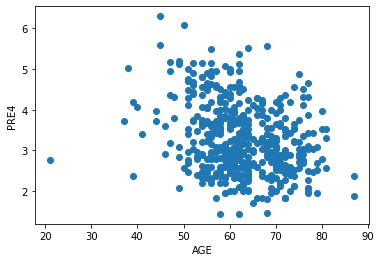

In [44]:
plt.scatter(matData['AGE'],matData['PRE4'])
plt.xlabel('AGE')
plt.ylabel('PRE4')
plt.show()

2) AGE에 대한 히스토그램( #1 : 디폴트, #2:bins 설정(10대,20대 .. 90대)

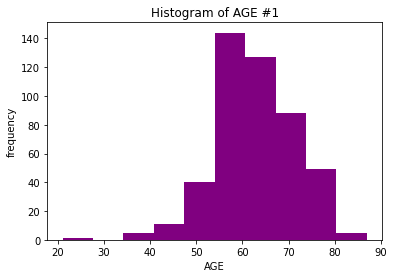

In [45]:
plt.title('Histogram of AGE #1')
plt.hist(matData['AGE'], color = 'purple')
plt.xlabel('AGE')
plt.ylabel('frequency')
plt.show()

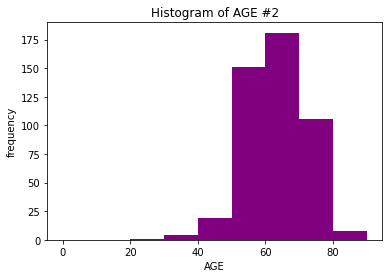

In [46]:
plt.title('Histogram of AGE #2')
plt.hist(matData['AGE'], color = 'purple', bins = range(0,100, 10))
plt.xlabel('AGE' )
plt.ylabel('frequency')
plt.show()

 3) Risk1Yr에 대한 파이차트

In [47]:
pie = matData.groupby(['Risk1Yr']).size()

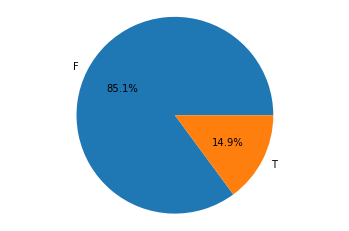

In [48]:
label = ['F','T']
plt.pie(pie, autopct = '%.1f%%', labels = label)
plt.axis('equal')
plt.show()

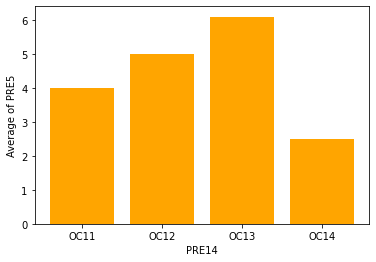

In [49]:
bar = matData.groupby(matData['PRE14']).mean()
plt.bar(bar.index, bar.PRE5, color='orange')
plt.xlabel('PRE14')
plt.ylabel('Average of PRE5')
plt.show()